In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Muat data asli
file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank-additional-full.csv"
df_original = pd.read_csv(file_path, sep=';')

# Buat salinan untuk dimodifikasi
df = df_original.copy()

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


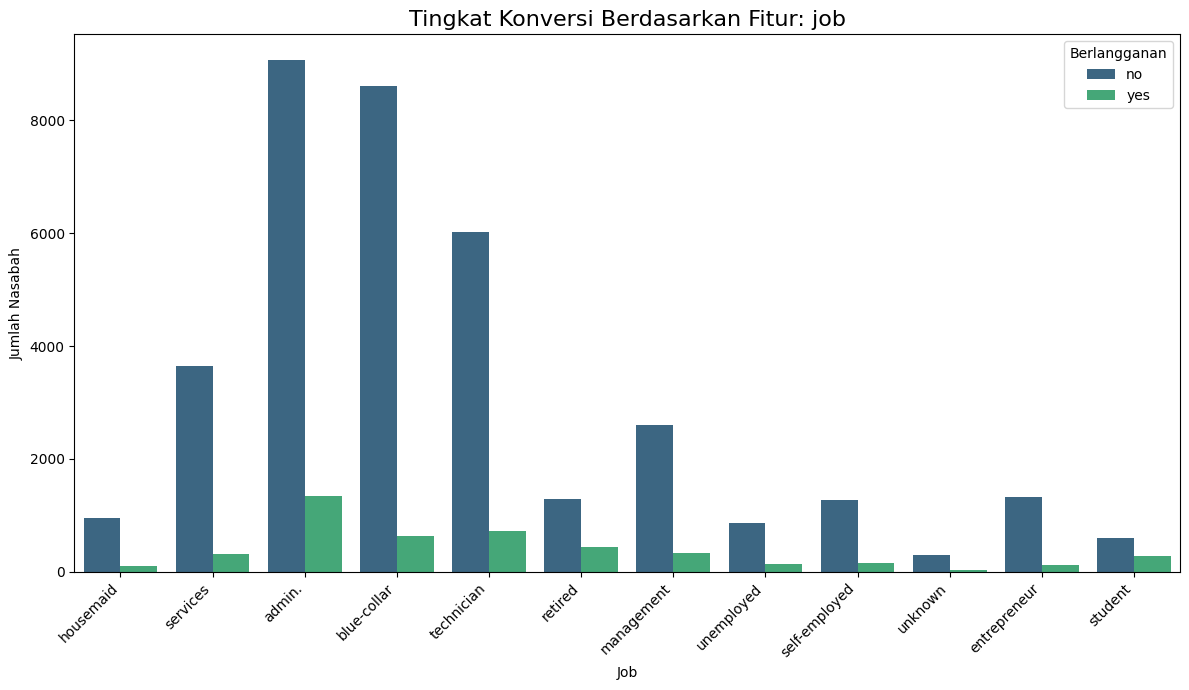

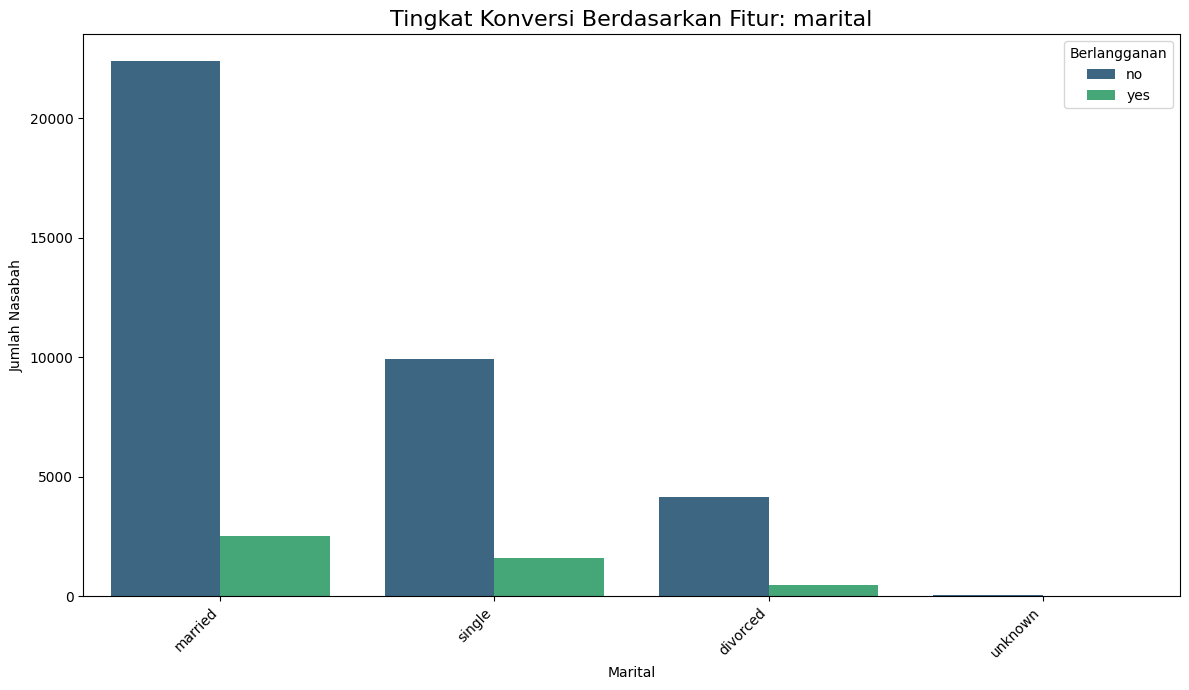

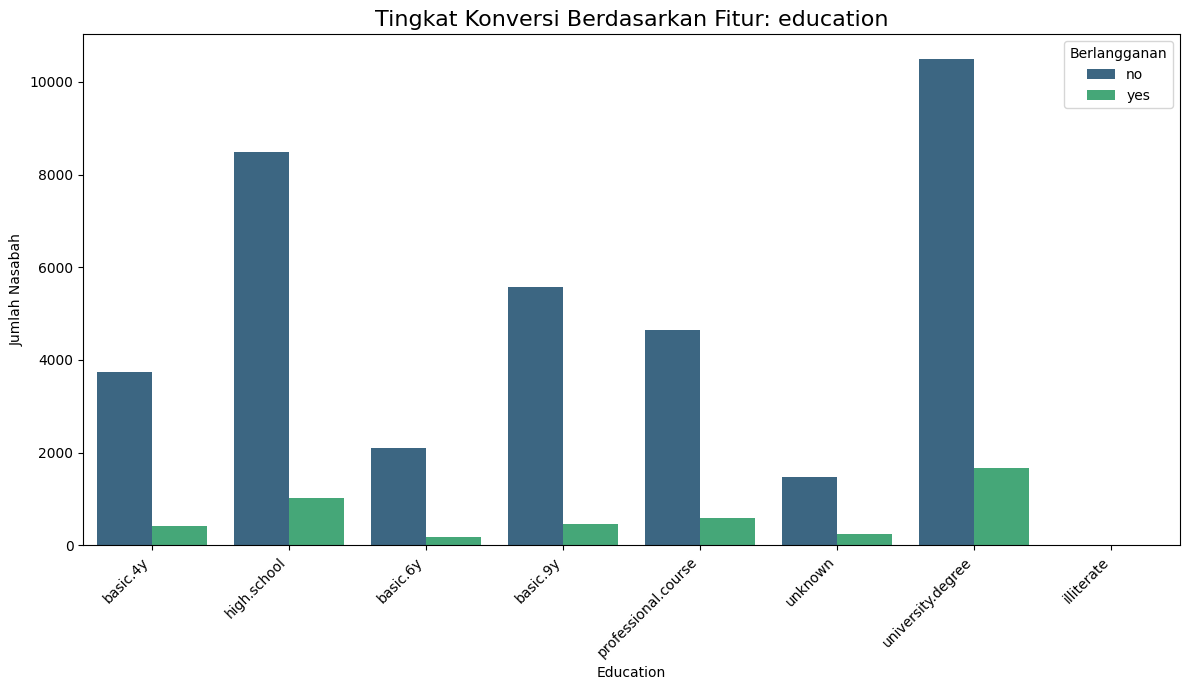

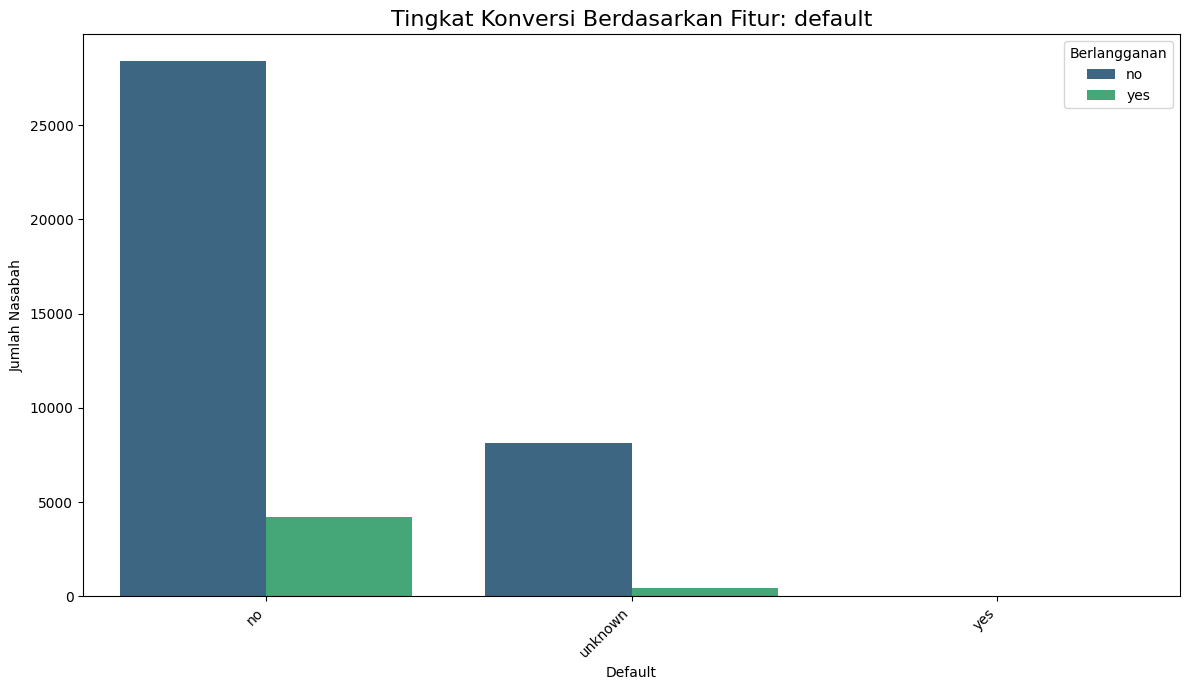

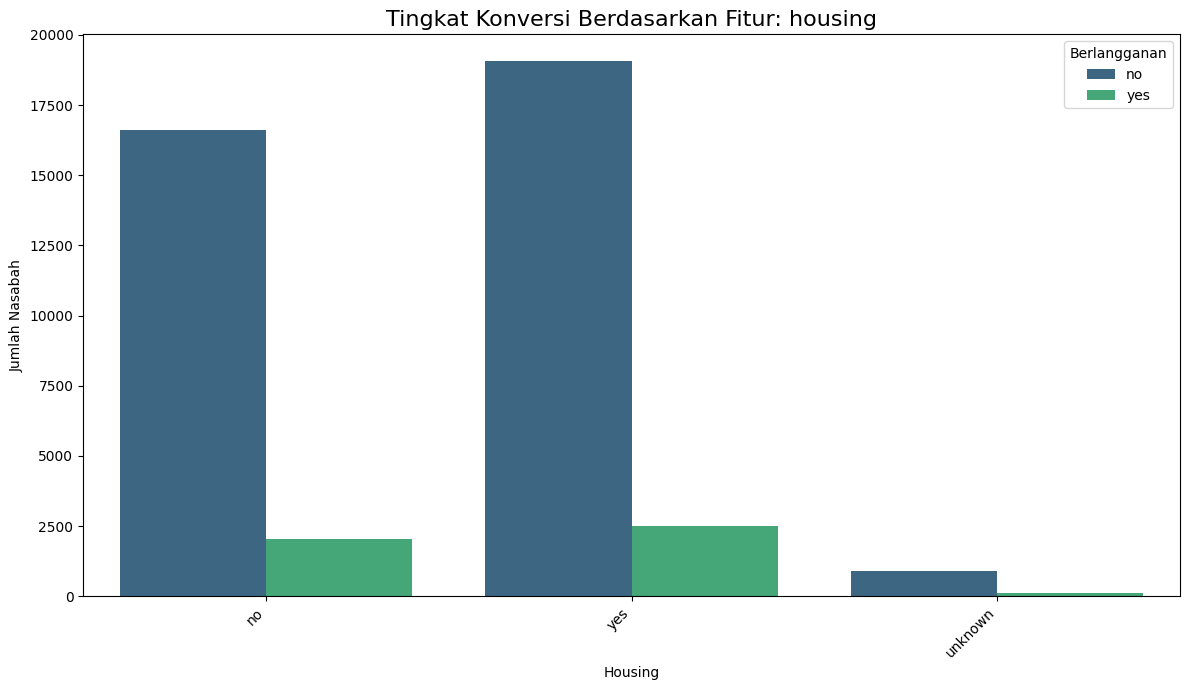

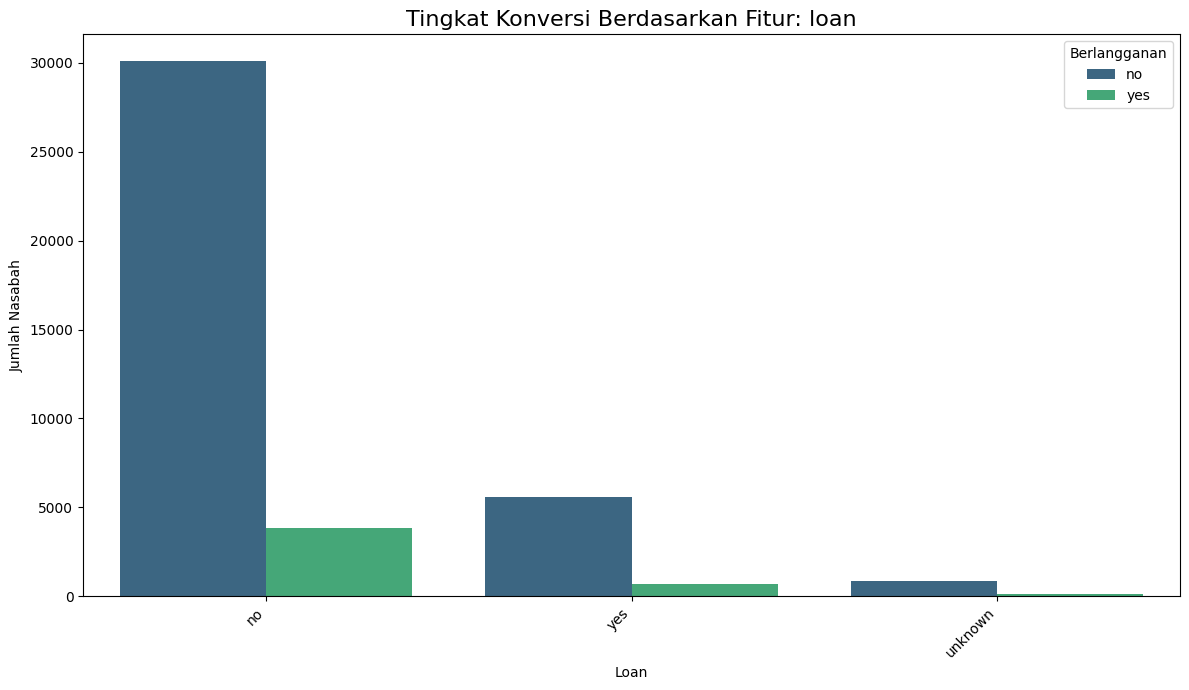

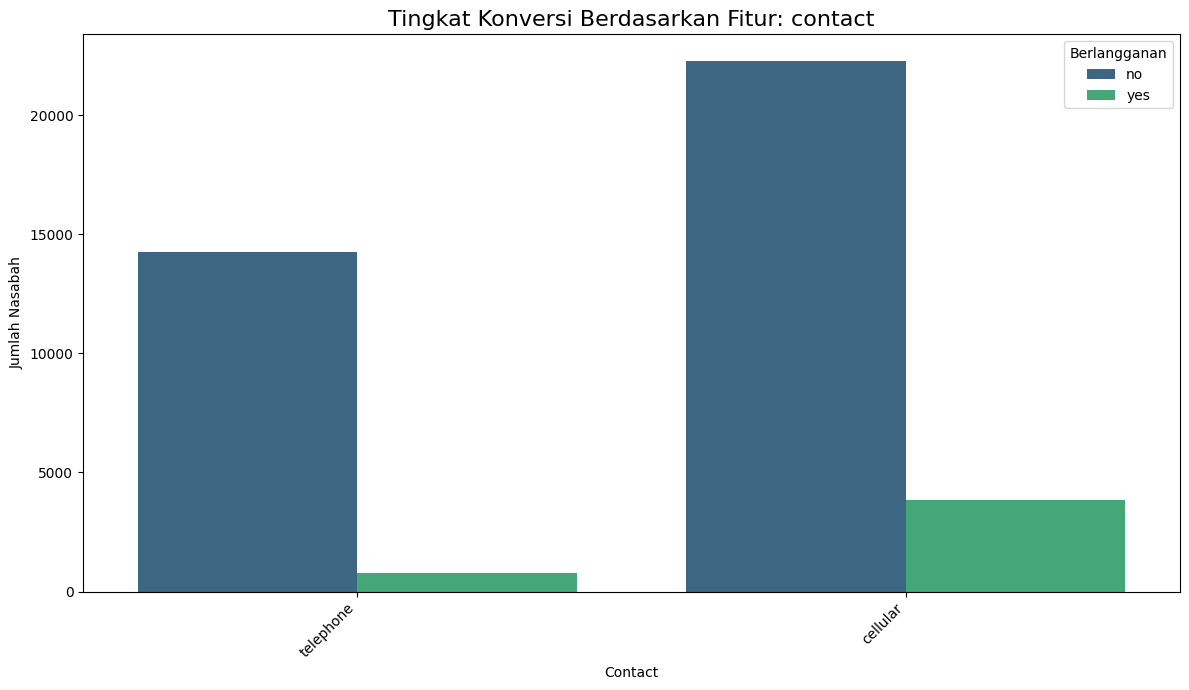

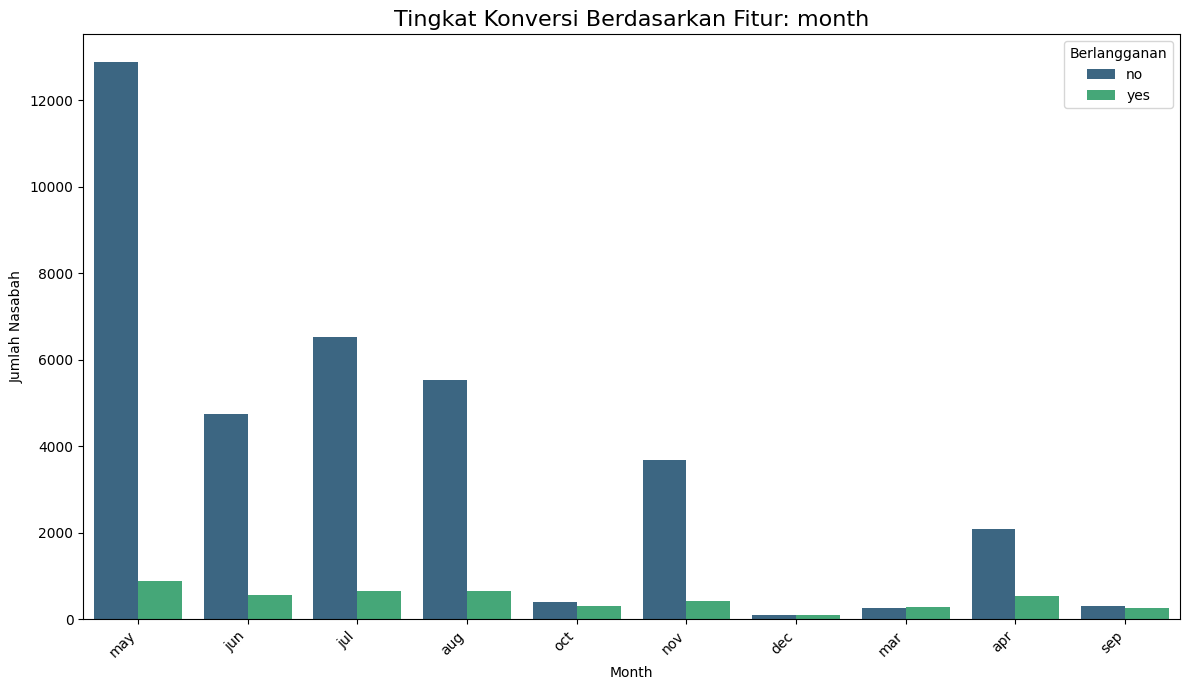

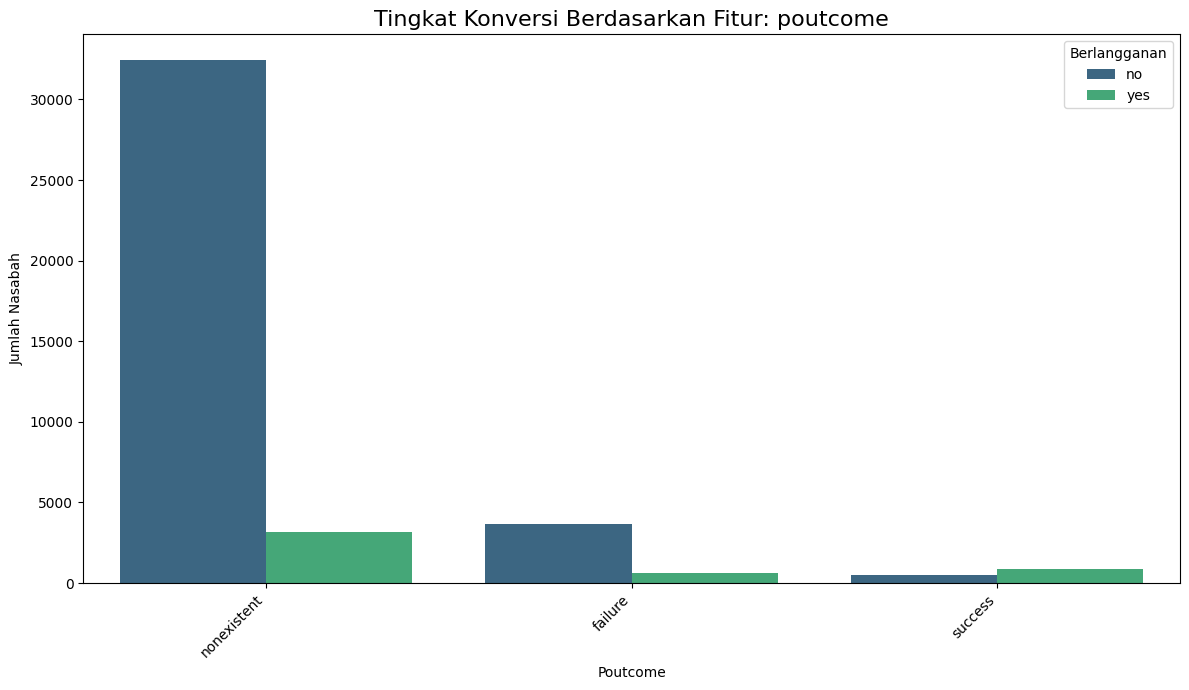

In [2]:
# --- Analisis Bivariat: Kategorikal vs Target ---

# Definisikan kolom kategorikal yang menarik
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Buat plot untuk setiap fitur
for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=feature, hue='y', palette='viridis')
    plt.title(f'Tingkat Konversi Berdasarkan Fitur: {feature}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Jumlah Nasabah')
    plt.xlabel(feature.capitalize())
    plt.legend(title='Berlangganan')
    plt.tight_layout()
    plt.show()

C:\Users\Besto\AppData\Local\Temp\ipykernel_19908\1598149242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=feature, palette='pastel')


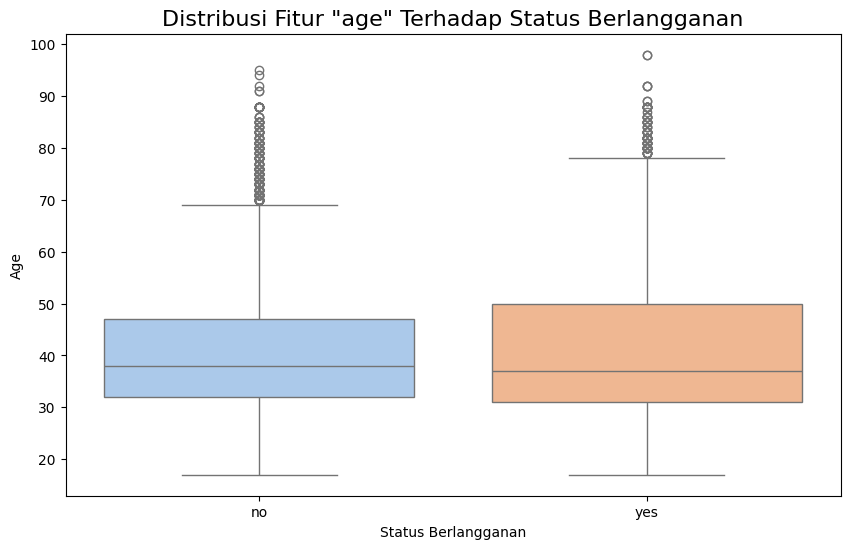

C:\Users\Besto\AppData\Local\Temp\ipykernel_19908\1598149242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=feature, palette='pastel')


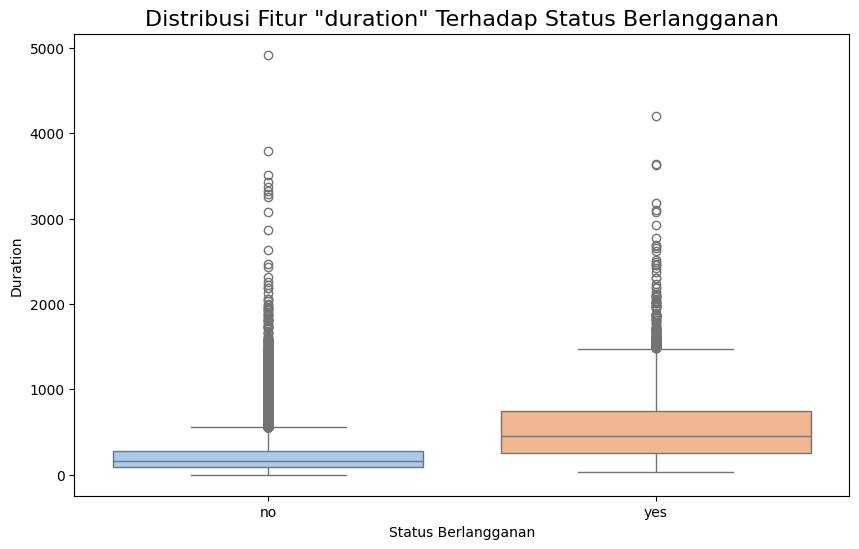

C:\Users\Besto\AppData\Local\Temp\ipykernel_19908\1598149242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=feature, palette='pastel')


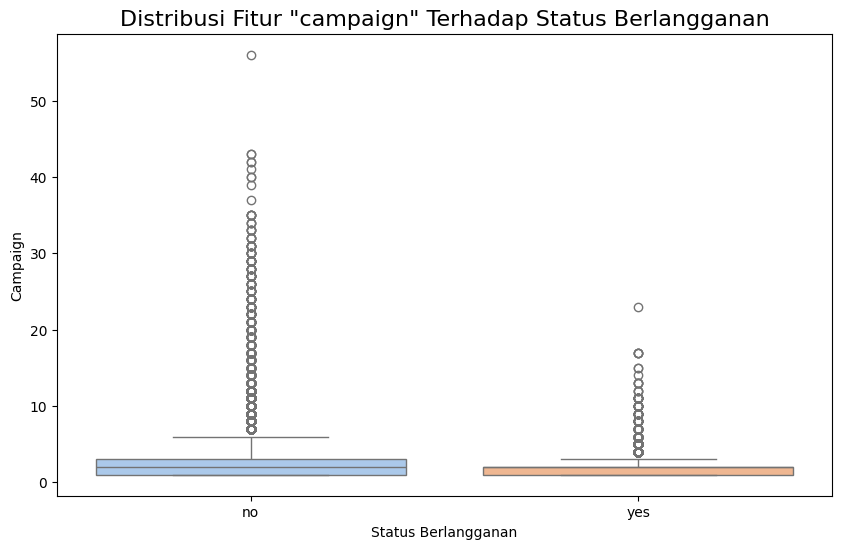

C:\Users\Besto\AppData\Local\Temp\ipykernel_19908\1598149242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=feature, palette='pastel')


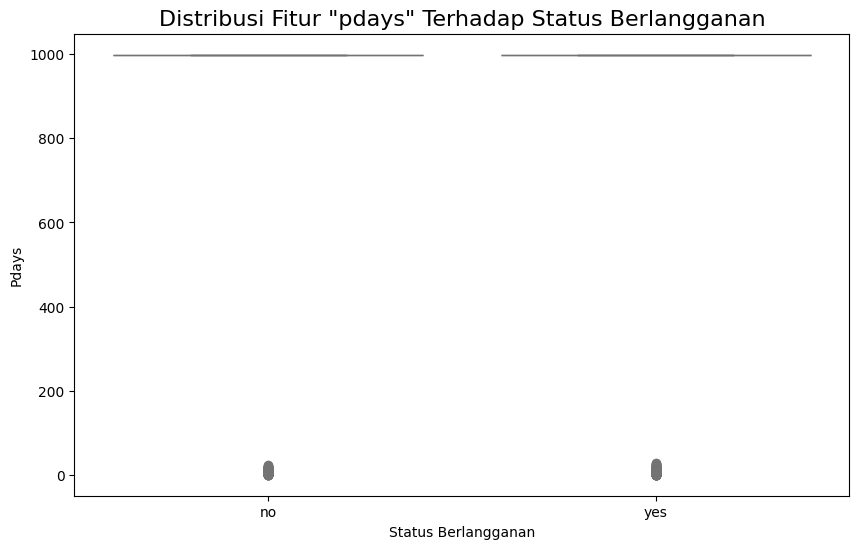

C:\Users\Besto\AppData\Local\Temp\ipykernel_19908\1598149242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=feature, palette='pastel')


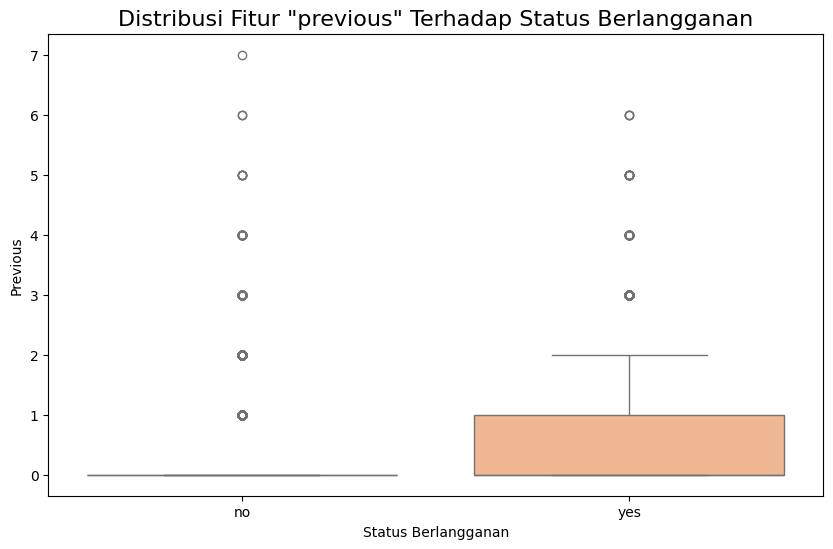

In [3]:
# --- Analisis Bivariat: Numerik vs Target ---

# Definisikan kolom numerik
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='y', y=feature, palette='pastel')
    plt.title(f'Distribusi Fitur "{feature}" Terhadap Status Berlangganan', fontsize=16)
    plt.ylabel(feature.capitalize())
    plt.xlabel('Status Berlangganan')
    plt.show()

In [4]:
# ===================================================================
#           PIPELINE PREPROCESSING v2.0 (LENGKAP)
# ===================================================================

# Mulai dengan salinan baru dari data asli
df_processed = df_original.copy()
print("Memulai preprocessing v2...")
print("Bentuk data awal:", df_processed.shape)


# --- Perbaikan 1: Hapus 'duration' untuk mencegah Data Leakage ---
# Keputusan: Model ini bertujuan untuk prediksi pra-panggilan, maka 'duration' harus dihapus.
df_processed.drop('duration', axis=1, inplace=True)
print("Kolom 'duration' telah dihapus untuk mencegah data leakage.")


# --- Perbaikan 2: Penanganan 'pdays' yang Benar ---
# Membuat fitur baru 'pernah_dihubungi' yang informatif.
df_processed['pernah_dihubungi'] = (df_processed['pdays'] != 999).astype(int)
# Menghapus kolom 'pdays' asli karena informasinya sudah ditangkap oleh fitur baru.
df_processed.drop('pdays', axis=1, inplace=True)
print("Fitur 'pdays' telah diubah menjadi 'pernah_dihubungi' (1=Ya, 0=Tidak).")


# --- Perbaikan 3: Imputasi 'unknown' (dengan Justifikasi) ---
# Justifikasi: Kami memilih modus karena ini adalah metode imputasi yang sederhana dan cepat.
# Asumsinya adalah nilai yang tidak diketahui kemungkinan besar mengikuti distribusi
# mayoritas dari data yang ada. Ini adalah baseline yang baik sebelum mencoba
# metode yang lebih kompleks seperti membuat kategori baru.
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for column in columns_to_impute:
    mode_value = df_processed[column].mode()[0]
    df_processed[column] = df_processed[column].replace('unknown', mode_value)
print(f"Nilai 'unknown' di kolom {columns_to_impute} telah diisi dengan modus.")


# --- Perbaikan 4: Proses Encoding yang Lebih Bersih ---
# Pisahkan fitur (X) dan target (y) SEBELUM encoding.
X = df_processed.drop('y', axis=1)
y = df_processed['y']

# Lakukan mapping pada target secara eksplisit
y = y.map({'yes': 1, 'no': 0})
print("Variabel target 'y' telah di-map ke format biner (1=yes, 0=no).")

# Lakukan One-Hot Encoding HANYA pada fitur (X)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Fitur kategorikal telah di-encode menggunakan One-Hot Encoding.")


# --- Finalisasi: Gabungkan kembali untuk disimpan ---
# Menggabungkan kembali X yang sudah di-encode dan y untuk analisis atau penyimpanan
df_final = pd.concat([X_encoded, y], axis=1)
print("\nPreprocessing v2 selesai!")
print("Bentuk data akhir:", df_final.shape)

# Tampilkan beberapa baris pertama dari data yang sudah benar-benar bersih
df_final.head()

Memulai preprocessing v2...
Bentuk data awal: (41188, 21)
Kolom 'duration' telah dihapus untuk mencegah data leakage.
Fitur 'pdays' telah diubah menjadi 'pernah_dihubungi' (1=Ya, 0=Tidak).
Nilai 'unknown' di kolom ['job', 'marital', 'education', 'default', 'housing', 'loan'] telah diisi dengan modus.
Variabel target 'y' telah di-map ke format biner (1=yes, 0=no).
Fitur kategorikal telah di-encode menggunakan One-Hot Encoding.

Preprocessing v2 selesai!
Bentuk data akhir: (41188, 47)


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pernah_dihubungi,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,0


In [6]:
# G. Menyimpan DataFrame yang Sudah Bersih
cleaned_file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned_1B.csv"
try:
    # Gunakan df_final untuk menyimpan
    df_final.to_csv(cleaned_file_path, index=False)
    print(f"DataFrame yang sudah bersih berhasil disimpan di:\n{cleaned_file_path}")
except Exception as e:
    print(f"Terjadi error saat menyimpan file: {e}")

DataFrame yang sudah bersih berhasil disimpan di:
D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned_1B.csv
